## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create Espresso Instances

In [2]:
data_folder='/Users/josesho/bin/git-repos/espresso/data'

starved_choice_folder=os.path.join(data_folder,'24-Hrs-starved-choice')
mb312b_folder=os.path.join(data_folder,'by_genotype/MB312B')
mb213b_folder=os.path.join(data_folder,'by_genotype/MB213B')

starved_choice=esp.espresso(starved_choice_folder)
mb312b=esp.espresso(mb312b_folder)
mb213b=esp.espresso(mb213b_folder)

## Plot Testing

Coloring feed volume time course by Genotype
Grouping feed volume time course by FoodChoice


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a0da828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a1016d8>], dtype=object)

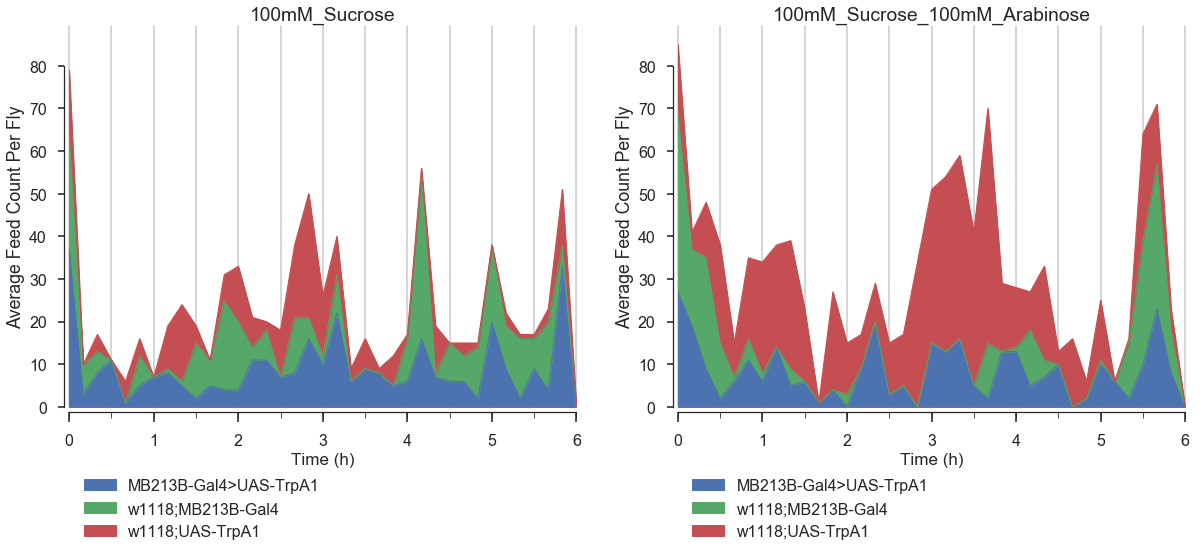

In [3]:
mb213b.plot.timecourse.feed_count(group_by='FoodChoice',color_by='Genotype')

Coloring feed volume time course by FoodChoice
Grouping feed volume time course by Genotype


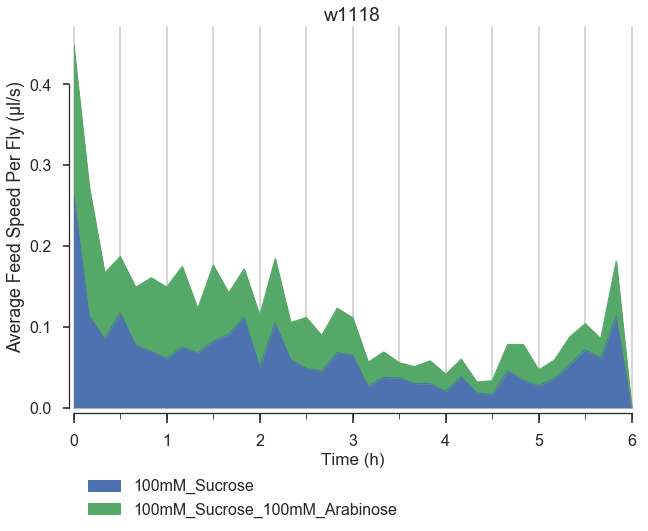

In [4]:
starved_choice.plot.timecourse.feed_speed()

## Used for Development

In [3]:
mb312b

4 feedlogs with a total of 120 flies.
3 genotypes ['w1118;MB312B-Gal4' 'MB312B-Gal4>UAS-TrpA1' 'w1118;UAS-TrpA1'].
2 temperatures [22 29].
2 foodtypes ['100mM_Sucrose' '100mM_Sucrose_100mM_Arabinose'].

In [4]:
df=mb312b.feeds.copy()


resample_by='10min'

yvar='Cumulative Feed Count'

In [5]:
df[df.FlyID==b.FlyID.unique()[50]].dropna().groupby('FoodChoice').count()

NameError: name 'b' is not defined

In [11]:
df.columns

Index(['StartTime', 'StartFrame', 'FeedTubeIdx', 'FlyID', 'ChoiceIdx',
       'AviFile', 'FeedVol_µl', 'FeedDuration_ms', 'Evap-mm3/s', 'Valid',
       'RelativeTime_s', 'ExperimentState', 'FeedVol_nl', 'FeedSpeed_nl/s',
       'FeedDuration_s', 'Genotype', 'Sex', 'Minimum Age', 'Maximum Age',
       'Tube1', 'Tube2', 'Temperature', 'FlyCountInChamber',
       'AverageFeedVolumePerFly_µl', 'AverageFeedCountPerFly',
       'AverageFeedSpeedPerFly_µl/s', 'FoodChoice', 'FeedLog_rawfile'],
      dtype='object')

In [13]:
df[df.FlyID==b.FlyID.unique()[90]][['Temperature','RelativeTime_s','FoodChoice','FeedVol_nl']]

,Temperature,RelativeTime_s,FoodChoice,FeedVol_nl
3389,29,1970-01-01 00:00:00.500,100mM_Sucrose,NaN
3391,29,1970-01-01 00:00:00.500,100mM_Sucrose_100mM_Arabinose,NaN
3376,29,1970-01-01 00:01:59.223,100mM_Sucrose_100mM_Arabinose,190.380
3377,29,1970-01-01 00:02:52.569,100mM_Sucrose_100mM_Arabinose,2.071
3378,29,1970-01-01 00:06:24.688,100mM_Sucrose_100mM_Arabinose,30.733
3379,29,1970-01-01 00:06:39.778,100mM_Sucrose_100mM_Arabinose,1.157
3380,29,1970-01-01 04:13:07.266,100mM_Sucrose_100mM_Arabinose,73.117
3381,29,1970-01-01 04:58:15.161,100mM_Sucrose_100mM_Arabinose,7.734
3382,29,1970-01-01 05:18:24.081,100mM_Sucrose_100mM_Arabinose,1.311
3383,29,1970-01-01 05:55:02.435,100mM_Sucrose,34.787


In [5]:
#### NO NEED TO TWEAK ####
if df.RelativeTime_s.dtype=='float64':
    df.loc[:,'RelativeTime_s']=pd.to_datetime(df['RelativeTime_s'],unit='s')
    
a=df.groupby(['Temperature','Genotype','FlyID','FoodChoice'])\
               .resample(resample_by,on='RelativeTime_s')\
               .sum()
a=pd.DataFrame( a.to_records() )

In [6]:
len( a.FlyID.unique() )

120

In [23]:
b=df.groupby(['Temperature','Genotype','FlyID','FoodChoice'])\
               .resample(resample_by,on='RelativeTime_s')\
               .sum()\
        .groupby(['Temperature','Genotype','FlyID','FoodChoice'])\
        .cumsum()\
        .groupby(['Temperature','Genotype','FlyID','FoodChoice'])\
        .fillna(method='bfill').fillna(method='bfill')

b=pd.DataFrame( b.to_records() )

b=b[['Temperature','Genotype','FlyID','FoodChoice',
           'RelativeTime_s',
             ### Below, add all the columns that are
             ### potentially used for cumulative plotting.
             'AverageFeedVolumePerFly_µl',
             'AverageFeedCountPerFly']]

b=esp._munger.__add_time_column(b)

b.rename(columns={'AverageFeedCountPerFly':'Cumulative Feed Count',
                  'AverageFeedVolumePerFly_µl':'Cumulative Consumption (µl)'},
           inplace=True)

In [20]:
mb312b

4 feedlogs with a total of 120 flies.
3 genotypes ['w1118;MB312B-Gal4' 'MB312B-Gal4>UAS-TrpA1' 'w1118;UAS-TrpA1'].
2 temperatures [22 29].
2 foodtypes ['100mM_Sucrose' '100mM_Sucrose_100mM_Arabinose'].

In [24]:
b[b.FlyID==b.FlyID.unique()[5]]

,Temperature,Genotype,FlyID,FoodChoice,RelativeTime_s,Cumulative Consumption (µl),Cumulative Feed Count,time_s
370,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 00:00:00,0.012229,1.0,0
371,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 00:10:00,0.345955,1.0,600
372,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 00:20:00,0.345955,1.0,1200
373,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 00:30:00,0.345955,1.0,1800
374,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 00:40:00,0.345955,1.0,2400
375,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 00:50:00,0.345955,1.0,3000
376,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 01:00:00,0.345955,1.0,3600
377,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 01:10:00,0.345955,1.0,4200
378,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 01:20:00,0.345955,1.0,4800
379,22,MB312B-Gal4>UAS-TrpA1,2017-03-14_13-17-28-MB312B-Gal4-UAS-TrpA1-22_F...,100mM_Sucrose,1970-01-01 01:30:00,0.345955,1.0,5400


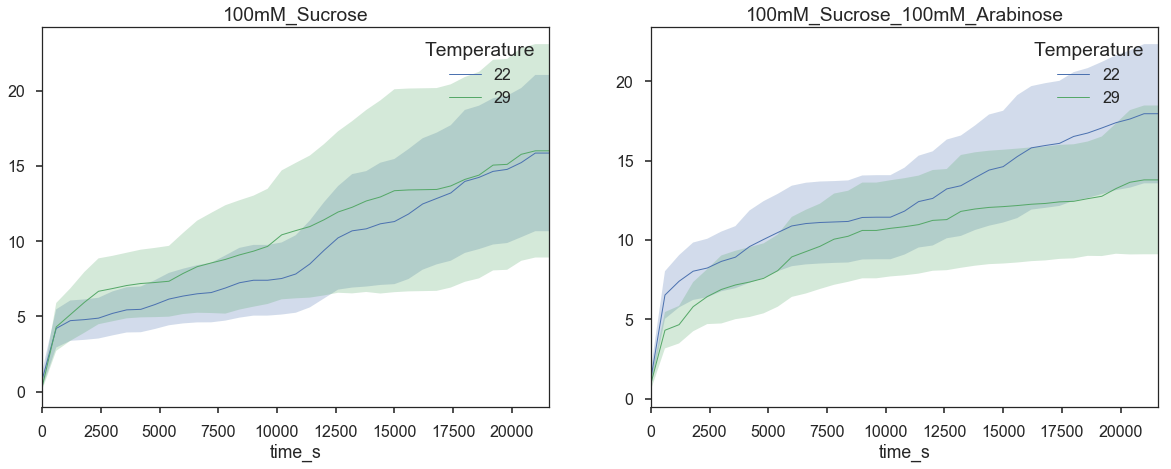

In [28]:
##### CUMULATIVE PLOT.

# plotdat=pd.DataFrame(a.to_records())
plotdat=b.copy()

group_by='FoodChoice'
color_by='Temperature'

yvar='Cumulative Feed Count'
# yvar='Cumulative Consumption (µl)'

sns.set(style='ticks',context='poster')
groupby_grps=np.sort( plotdat[group_by].unique() )
num_plots=int( len(groupby_grps) )

x_inches=10*num_plots
y_inches=7
    
fig,axx=plt.subplots(nrows=1,
                      ncols=num_plots,
                      figsize=(x_inches,y_inches),
                      gridspec_kw={'wspace':0.2} )

# Loop through each panel.
for c, grp in enumerate( groupby_grps ):
    if len(groupby_grps)>1:
        plotax=axx[c]
    else:
        plotax=axx
        
    ## Filter plotdf according to group_by.
    temp_plotdf=plotdat[plotdat[group_by]==grp]

    ### and make cumulative plot.
    temp_plotdf_groupby = temp_plotdf.groupby([color_by,'time_s'])
    temp_plotdf_mean = temp_plotdf_groupby.mean().unstack()[yvar].T
    temp_plotdf_mean.plot(ax=plotax,lw=1)

    temp_plotdf_halfci = temp_plotdf_groupby.sem().unstack()[yvar].T*1.96
    lower_ci = temp_plotdf_mean-temp_plotdf_halfci
    upper_ci = temp_plotdf_mean+temp_plotdf_halfci
    
    for c in temp_plotdf_mean.columns:
        plotax.fill_between(temp_plotdf_mean.index,
                         lower_ci[c],upper_ci[c],
                           alpha=0.25)
    plotax.set_title(grp)

In [116]:
temp_plotdf_mean

Genotype,MB213B-Gal4>UAS-TrpA1,w1118;MB213B-Gal4,w1118;UAS-TrpA1
time_s,,,
0,1.500000,0.884615,1.000000
600,3.862069,3.520000,4.434783
1200,4.233333,3.960000,4.333333
1800,4.700000,3.434783,5.000000
2400,4.800000,3.434783,5.125000
3000,4.966667,3.434783,6.040000
3600,5.551724,3.869565,6.846154
4200,5.312500,3.869565,7.692308
4800,5.718750,3.750000,9.076923
